# Classification Problem - Predicting Customer Churn 🛫

------------

## Quick reminder on `Jupyter Notebook` and `Python` basics 🚴‍♀️

Notebook consists of two main parts.

1. Text instructions like this one - these are made using a text formatting language called [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

2. Code cells like the one below:

In [ ]:
1 + 1 * 2

1. To run a code cell, click into it with your mouse and press the `► Run` button in the navbar at the top of the notebook. 
2. You can also use the shortcut `Shift + Enter` to run a cell!
3. A cell that has been run will get a `In [number]` next to it
4. An output (returned value) of a cell will be displayed below with a `Out[number]` next to it
5. If you want to add another code cell - look for the `➕` button in the navbar.

In **Python** we have **built-in data types** to help us work with different kinds of data:

**Strings** (`str` in Python) for **literal text, column or file names**. Made by putting quotes (`""`) around the text.

In [ ]:
"hello!"
"ML like a pro"

**Integers** (`int` in Python) for **whole numbers**

In [ ]:
42
-10

**Floats** (`float` in Python) for **numbers with decimal points**. The decimal delimeter is always `.`

In [ ]:
3.14

We have **variables** to help store data:

In [ ]:
name = "Alan Turing"
age = 42
new_hire = [[0, 30, 3, 7.1, 12]]

...and **re-use** it later!:

In [ ]:
"Hi, my name is " + name

We can also **update** variables:

In [ ]:
# getting one year older :(
age = age + 1
age

And we have **methods** to perform actions on data:

In [ ]:
name.upper()

In [ ]:
number_of_n = name.count('n') # creating a new variable as a result of the method call
number_of_n

----------

# A new model - K-Nearest Neighbors 🤜 🤛 

[K-Nearest Neighbors (or KNN)](https://scikit-learn.org/0.24/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a distance-based model that can be used both for regression (predict a number) or classification (predict a category).

**And the best part?** The steps are exactly the same for KNN model as for the Linear Regression we just did! 🙌

1. Let's start by importing the necessary Python libraries again

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

2. Let's get the data from `CSV` into a nice `DataFrame`

In [2]:
churn = pd.read_csv('churn.csv')
churn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,1,41,1,83807.86,1,0,1,112542.58,0
1,502,1,42,8,159660.80,3,1,0,113931.57,1
2,850,1,43,2,125510.82,1,1,1,79084.10,0
3,645,0,44,8,113755.78,2,1,0,149756.71,1
4,376,1,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...
6378,597,1,53,4,88381.21,1,1,0,69384.71,1
6379,644,0,28,7,155060.41,1,1,0,29179.52,0
6380,516,0,35,10,57369.61,1,1,1,101699.77,0
6381,772,0,42,3,75075.31,2,1,0,92888.52,1


3. Always a good idea to do some **visual exploration** first 📊

In this case, we care about whether the customer has `Exited` or **churned**. So we can try to plot the different features (inputs) keeping `Exited` as the color differentiator (hue).

### (Optional) Visualize the data! 📊

Experiment with the `scatterplot` below by changing which columns will be `x` axis and `y` axis. Make sure to type the column names correctly! 👀

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

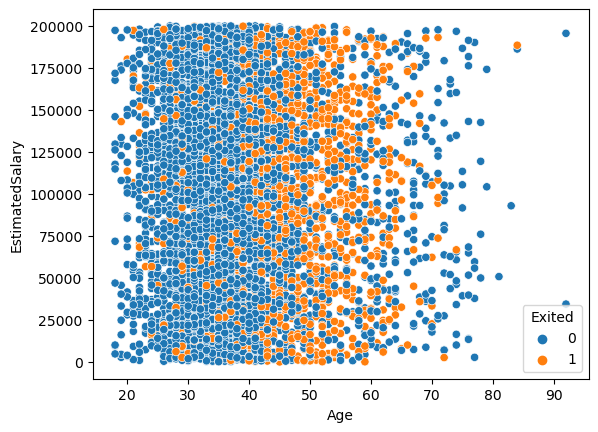

In [5]:
sns.scatterplot(data=churn, x='Age', y='EstimatedSalary', hue='Exited')

----------

4. Time for Machine Learning! Import the model from Scikit-learn:

In [6]:
from sklearn.neighbors import KNeighborsClassifier

5. Initialize the model and **pick a number of neighbors** `n_neighbors` to match against:

In [7]:
model = KNeighborsClassifier(n_neighbors=3)

6. Create our `inputs` and `output`. This time let's call them `x` and `y`:

In [8]:
x = churn.drop(["Exited"], axis="columns") # dropping the output column to create the inputs (features)
y = churn["Exited"]

Feel free to check your `x` and `y` below 👇

In [ ]:
# your code here

### 1. Your turn! 🚀

The **training** and **scoring** part is exactly the same as with the first model - try to solve it!

**💡Tip:** try adjusting the number of neighbors - `n_neighbors` - above until you get the best result.

In [9]:
# your code here
model.fit(x,y) # this trains the model
model.score(x,y) # this scores the model

0.8171706094313019

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
model.fit(x,y) # this trains the model
model.score(x,y) # this scores the model
</pre>
</details>

This time score metric is **accuracy** - how many predictions did the model get right in our dataset.

How is your score? Pretty great for 10 minutes of work, right?! 🤩 Well...

----------

## We've been cheating! 😳

We've been scoring the model on the same data as it is trained on - too easy! That is called **data leakage**.

Scikit-learn library saves us again - let's import and use the [`train_test_split` method](https://scikit-learn.org/0.24/modules/generated/sklearn.model_selection.train_test_split.html) 

In [10]:
from sklearn.model_selection import train_test_split

Below line might look a little crazy. Don't worry.

The `train_test_split` method gives us all the datasets we need - inputs and outputs for both training and testing. So we simultaneously create four new variables to store that.

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

### 2. Your turn - this time no cheating! 🚀

Now that we have training and testing datasets, you should **initialize** a new model, **train** and **score** it again with the right datasets.

In [12]:
# your code here
model = KNeighborsClassifier(n_neighbors=3)

model.fit(xtrain, ytrain) # using only the training data
model.score(xtest, ytest) # using unseen testing data to score

0.6906812842599843

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
model = KNeighborsClassifier(n_neighbors=3)

model.fit(xtrain, ytrain) # using only the training data
model.score(xtest, ytest) # using unseen testing data to score
</pre>
</details>

----------

### 3.1. Your turn - prediction! 🚀

The prediction also works exactly as the previous model, so we let you do that. We created an example customer which you can tune.

In [13]:
customer = pd.DataFrame({
    'CreditScore': [608],
    'Gender': [1],
    'Age': [31],
    'Tenure': [20],
    'Balance': [81207.86],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [0],
    'EstimatedSalary': [11142.58]
})
# your code here
model.predict(customer)

array([0])

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
model.predict(customer)
</pre>
</details>

### 3.2. Your turn! 🚀Adding probability

To understand the model's decision a bit more, we can use the `predict_proba()` method. It works exactly the same as the `predict()` method you used above. Can you write the code?

In [14]:
# your code here
model.predict_proba(customer)

array([[0.66666667, 0.33333333]])

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
model.predict_proba(customer)
</pre>
</details>

### 4. Your turn! 🚀

Try to tune the features inside `customer` variable to get different results. What insights can you see? 🔍

In [ ]:
# your code here

----------

### Explainability? Already harder with KNN model 😓

We need to use a [feature permutation](https://scikit-learn.org/0.24/modules/generated/sklearn.inspection.permutation_importance.html) method provided by `Scikit-learn`.

This method runs the model scoring many times, by changing (*permutating*) one feature at a time, to see which one causes the most change in the target.

In [15]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(model, xtrain, ytrain, n_repeats=10)

np.vstack((x.columns, permutation_score.importances_mean)).T

array([['CreditScore', 0.000117508813161038],
       ['Gender', 0.0],
       ['Age', 0.0],
       ['Tenure', 0.0],
       ['Balance', 0.12708578143360755],
       ['NumOfProducts', 0.0],
       ['HasCrCard', 0.0],
       ['IsActiveMember', 0.0],
       ['EstimatedSalary', 0.12457892675283984]], dtype=object)

# Congratulations on your first ML models, heroes! 🦸‍♀️🦸‍♂️

-----

## 🕵️‍♀️ Going further? (Optional Challenge) KNN only on categorical columns!

You probably noticed that the **categorical columns** - such as `HasCrCard` or `NumOfProducts` - have virtually no influence on the above model.

It might just be that they are strongly outweighed by the other columns, like `Balance` or `EstimatedSalary`. It would be a good idea **create a new model** *only* for the categorical columns.

### Your turn - build your own model! 🚀

Create a new KNN model **from scratch** and repeat the steps all the way to prediction but this time **only on the categorical columns**. We listed them below:

`['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']`

#### **💡Tip:**  Don't be shy to re-use from before and adapt it to the current challenge!

1. Create our `x` (inputs) and `y` (output) datasets

In [16]:
# your code goes here
x = churn.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], axis='columns')
  # or instead of dropping columns, we can also just select the ones we need:
x = churn[['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']]

y = churn.Exited

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
x = churn.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], axis='columns')
  # or instead of dropping columns, we can also just select the ones we need:
x = churn[['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']]

y = churn.Exited
</pre>
</details>

2. Split our data into training and testing data with `train_test_split`   (*P.S. no need to `import` a second time*)

In [17]:
# your code here
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
</pre>
</details>

3. Initialize a KNN model. Pick the number of neighbors `n_neighbors` you like 🙂

In [19]:
# your code here
classifier = KNeighborsClassifier(n_neighbors=3)

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
classifier = KNeighborsClassifier(n_neighbors=3)
</pre>
</details>

4. Train (or fit) the model with the training `x` and `y` datasets

In [20]:
# your code here
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
classifier.fit(xtrain, ytrain)
</pre>
</details>

5. Score the model on the testing data. How is the accuracy? Is it comparable to the first model?

In [21]:
# your code here
classifier.score(xtest, ytest)

0.7689898198903681

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
classifier.score(xtest, ytest)
</pre>
</details>

6. Make predictions and checking prediction probability! 🔮 

We left a `customer` sample below but **make sure to adjust the numbers to your column order** - you can check the column order by checking your `x` (inputs) dataset

In [23]:
customer = pd.DataFrame({
    'NumOfProducts': [1],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'Gender': [1]
})

# your code here
classifier.predict(customer)
   # and in another code cell:
classifier.predict_proba(customer)

array([[1., 0.]])

<details>
    <summary>Reveal Solution 🙈</summary>

<p> 
<pre>
classifier.predict(customer)
   # and in another code cell:
classifier.predict_proba(customer)
</pre>
</details>

7. **Explainability** - let's check importance of each input with `permutation_importance` once again. What do you find? 🔍

⚠️ We left the variables that **you need to replace with your variables** in `UPCASED_LETTERS` 👇

In [25]:
permutation_score = permutation_importance(classifier, xtrain, ytrain, n_repeats=10)

np.vstack((xtrain.columns, permutation_score.importances_mean)).T

array([['NumOfProducts', 0.04657265961613789],
       ['HasCrCard', 0.001899725812769293],
       ['IsActiveMember', 0.004641598119859003],
       ['Gender', 0.0004700352526439633]], dtype=object)

**Bonus:** we can visualize the findings above with another `scatterplot`:

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

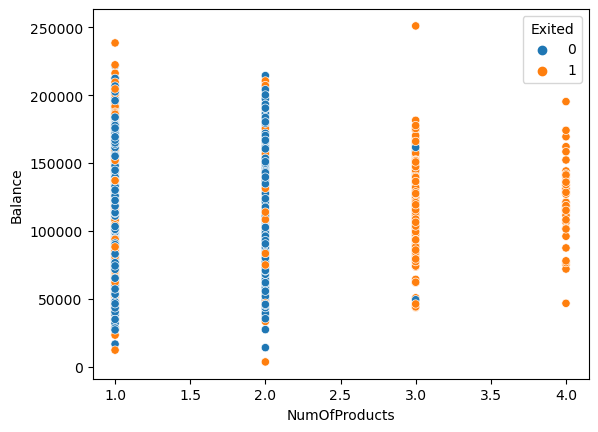

In [26]:
sns.scatterplot(data=churn, x='NumOfProducts', y='Balance', hue='Exited')

# Congratulations on completing the optional challenge! 🏋️‍♀️🏋️‍♂️